In [1]:
# APMAE4990 Inrto_Data_Science Homework 1
# Name: Ho Hin Lee
# Uni: hl3003

# read data into a DataFrame
import pandas as pd
import pylab as plt
import seaborn
from sklearn.linear_model import LinearRegression
import numpy.random as nprnd
import random
import json
import numpy as np
pd.set_option('display.max_columns', 500)
%matplotlib inline

df = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


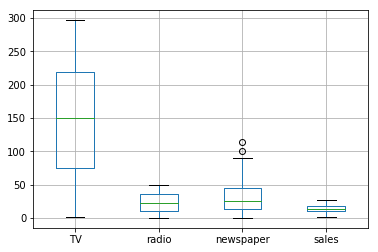

In [2]:
df.boxplot()
plt.show()

/Users/peter/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


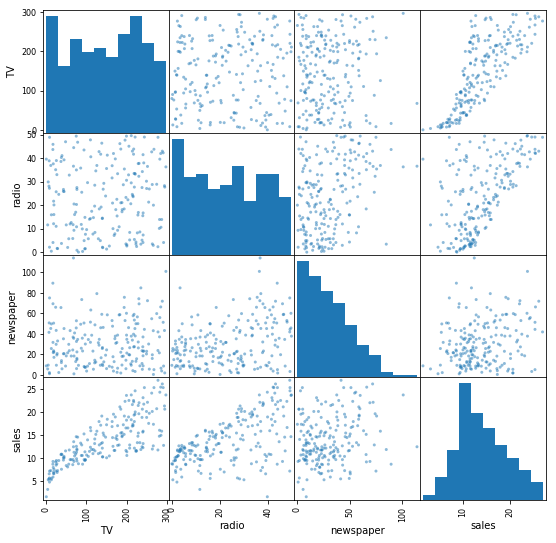

In [3]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(df,figsize=(9, 9))
plt.show()

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

y = df['sales']
x = df.drop(['sales'],axis=1) 

size = float(len(x))
x_train = x[0:int(size*0.8)]
x_test = x[int(size*0.8):]

In [5]:
y_train = y[0:int(size*0.8)]
y_test = y[int(size*0.8):]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [6]:
regr = LinearRegression()
regr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [7]:
print('Coefficients: \n', regr.coef_)
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(x_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x_test, y_test))

Coefficients: 
 [ 0.04472952  0.18919505  0.00276111]
Residual sum of squares: 3.17
Variance score: 0.90


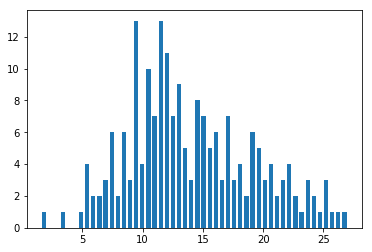

In [8]:
hist, bins = np.histogram(y, bins=50)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.show()

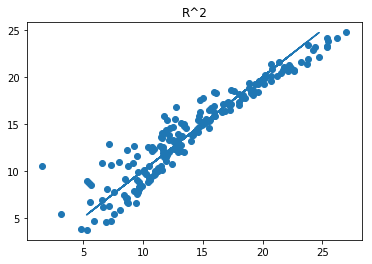

In [9]:
plt.title('R^2')
plt.scatter(y,regr.predict(x))
plt.plot(y_test,y_test)

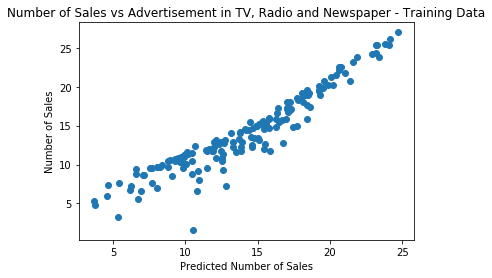

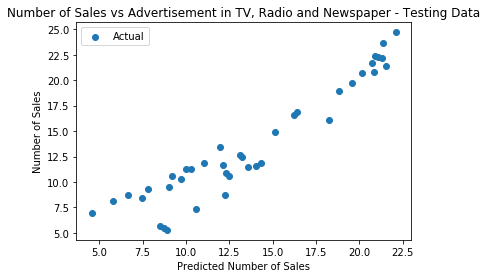

In [10]:
plt.ylabel('Number of Sales')
plt.xlabel('Predicted Number of Sales')
plt.title('Number of Sales vs Advertisement in TV, Radio and Newspaper - Training Data')
plt.scatter(regr.predict(x_train),y_train)
plt.show()
plt.ylabel('Number of Sales')
plt.xlabel('Predicted Number of Sales')
plt.title('Number of Sales vs Advertisement in TV, Radio and Newspaper - Testing Data')
plt.scatter(regr.predict(x_test),y_test,label='Actual')
#plt.plot(X_test['hotel_rating'],regr.predict(X_test),color='r',label='Predicted')
plt.legend(loc=2)
plt.show()

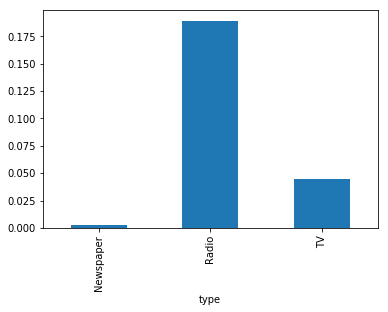

In [11]:
regr.coef_
df = pd.DataFrame({'type':['TV','Radio','Newspaper'], 'coef':regr.coef_})

df.groupby('type')['coef'].mean().plot(kind='bar')

In [12]:
mdl = regr.fit(x_train, y_train)
a = mdl.coef_[0]
b = mdl.intercept_
print ("formula = {0}x + {1}" .format (a,b))

formula = 0.044729517468716326x + 2.979067338122629


In [28]:
# For measuring the importance of coefficient, we need to normalise the data and eliminate the collinear features from the data
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
X = x.as_matrix().astype(np.float)
X = scaler.fit_transform(x)

size = float(len(x))
x_train = X[0:int(size*0.8)]
x_test = X[int(size*0.8):]
y_train = y[0:int(size*0.8)]
y_test = y[int(size*0.8):]

regr = LinearRegression()
regr.fit(x_train, y_train)

print('Coefficients: \n', regr.coef_)
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(x_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x_test, y_test))

Coefficients: 
 [ 3.39597948  2.18857652 -0.764867    1.49548237]
Residual sum of squares: 1.71
Variance score: 0.94


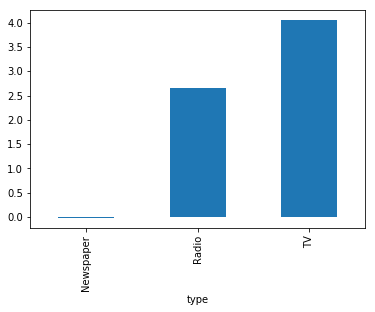

In [14]:
regr.coef_
df = pd.DataFrame({'type':['TV','Radio','Newspaper'], 'coef':regr.coef_})

df.groupby('type')['coef'].mean().plot(kind='bar')

/Users/peter/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


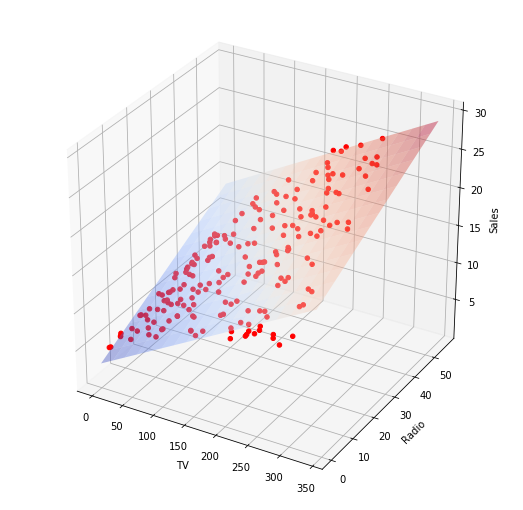

In [27]:
# Plotting a hyperplane model
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
from matplotlib import cm

df1 = df = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
model = sm.ols(formula='sales ~ TV + radio', data = df1)
fit = model.fit()
fit.summary()

fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111, projection='3d')

x_surf = np.arange(0, 350, 20)                # generate a mesh
y_surf = np.arange(0, 60, 4)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)

exog = pd.core.frame.DataFrame({'TV': x_surf.ravel(), 'radio': y_surf.ravel()})
out = fit.predict(exog = exog)
ax.plot_surface(x_surf, y_surf,
                out.reshape(x_surf.shape),
                rstride=1,
                cstride=1,
                color='None',
                alpha = 0.4,cmap=cm.coolwarm)

ax.scatter(df1['TV'], df1['radio'], df1['sales'],
           c='red',
           marker='o',
           alpha=1)

ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Sales')

plt.show()


In [16]:
# introduce non-linear term (2)
x['TV*radio*newspaper']=x['TV']*x['radio']

size = float(len(x))
x_train = x[0:int(size*0.8)]
x_test = x[int(size*0.8):]
y_train = y[0:int(size*0.8)]
y_test = y[int(size*0.8):]

regr = LinearRegression()
regr.fit(x_train, y_train)

print('Coefficients: \n', regr.coef_)
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(x_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x_test, y_test))

Coefficients: 
 [  3.96544369e-02   1.47780479e-01  -3.52082153e-02   8.14247638e-06]
Residual sum of squares: 1.71
Variance score: 0.94


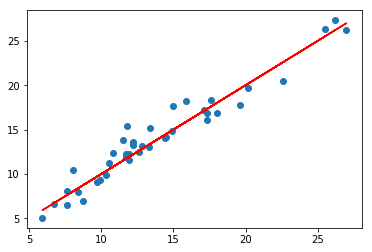

In [17]:
plt.scatter(y_test,regr.predict(x_test))
plt.plot(y_test,y_test,color='r')

/Users/peter/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  app.launch_new_instance()


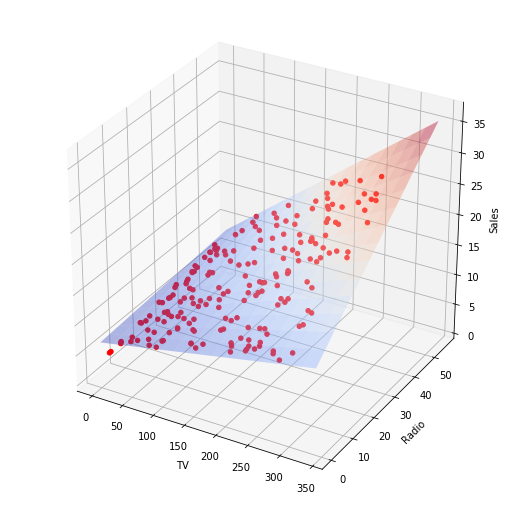

In [25]:
df1 = df = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
model = sm.ols(formula='sales ~ TV * radio', data = df1)
fit = model.fit()
fit.summary()

fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111, projection='3d')

x_surf = np.arange(0, 350, 20)                # generate a mesh
y_surf = np.arange(0, 60, 4)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)

exog = pd.core.frame.DataFrame({'TV': x_surf.ravel(), 'radio': y_surf.ravel()})
out = fit.predict(exog = exog)
ax.plot_surface(x_surf, y_surf,
                out.reshape(x_surf.shape),
                rstride=1,
                cstride=1,
                color='None',
                alpha = 0.4,cmap=cm.coolwarm)

ax.scatter(df1['TV'], df1['radio'], df1['sales'],
           c='red',
           marker='o',
           alpha=1)

ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Sales')

plt.show()

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 10 iterations b = 0.02963934787473239, m = 1.4774173755483797, error = 112.65585181499746


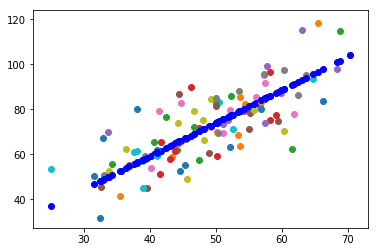

In [18]:
from numpy import *

# y = mx + b
# m is slope, b is y-intercept
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
    return [b, m]
errors=[]

def run(num_iterations,learning_rate = 0.0001):
    points = genfromtxt("/Users/peter/Desktop/Data_science_machine_learning/hw1data.csv", delimiter=",")
    learning_rate = learning_rate
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = num_iterations
    print ("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
    print ("Running...")
    
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print ("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))
    for i in range(0,len(points)):
        plt.scatter(points[i,0],points[i,1])
        plt.scatter(points[i,0],m*points[i,0]+b,color='b')

run(10)

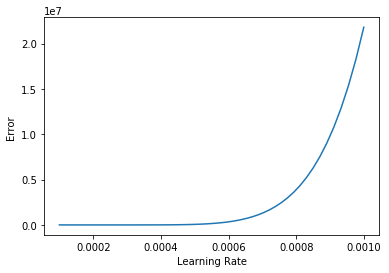

In [21]:
points = genfromtxt("/Users/peter/Desktop/Data_science_machine_learning/hw1data.csv", delimiter=",")

initial_b = 0 # initial y-intercept guess
initial_m = 0 # initial slope guess
num_iterations = 3
#print "Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points))
#print "Running..."
errors=[]
learning_rates = np.logspace(-4,-3,100)

for l in learning_rates:
    learning_rate = l
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    errors.append(compute_error_for_line_given_points(b, m, points))

plt.xlabel('Learning Rate')
plt.ylabel('Error ')

plt.plot(learning_rates,errors,label='num_iterations='+str(num_iterations))


In [23]:
# When the learning rate is set to 0.0001, the results showed that there is a high convergence rate beause the absolute error is mantained 
# in the value of 0.02. After that, if I coninue to decrease the learning rate, the convergence rate will be comparatively lower and become
# 31.3. Oppositely, if the learning rate increase, the value of absolute error will become very large and it can be shown that the optimal 
# learning is nearly to 0.0001.

# We have found that the learning rate can be used to determine the time step size and the gradient method is used to decrease the step size 
# for a given convex function. If the learning rate is too small, a larger time steps sill be calculatd. Oppositely, the solution will be too 
# too slow if the learning rate is too small. Therefore, it is needed to find a optimal value for learning rate to prevent the divergence of 
# solution.

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 0 iterations b = 0, m = 0, error = 5565.107834483211


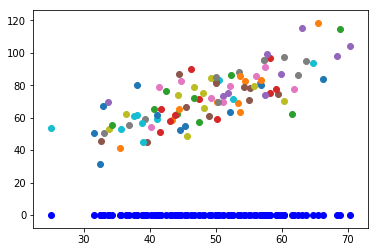

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 1 iterations b = 0.014547010110737297, m = 0.7370702973591052, error = 1484.586557408649


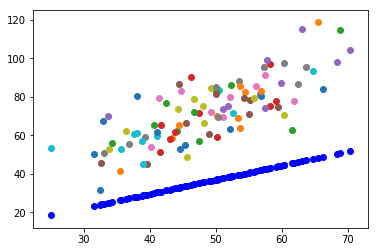

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 2 iterations b = 0.02187396295959641, m = 1.1067954543515157, error = 457.8542575737673


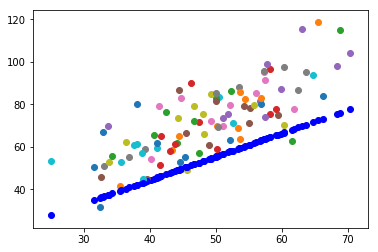

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 3 iterations b = 0.025579224321293136, m = 1.2922546649131115, error = 199.50998572553894


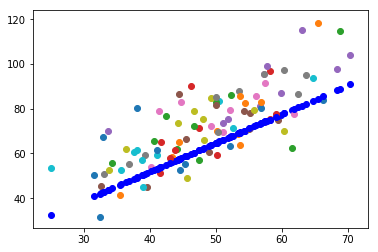

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 4 iterations b = 0.027467789559144355, m = 1.385283255651245, error = 134.50591058200533


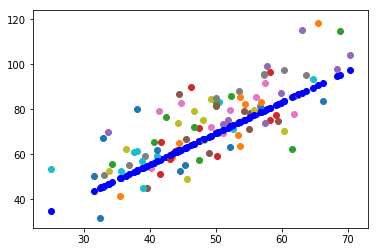

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 5 iterations b = 0.028445071981738963, m = 1.4319472323843205, error = 118.14969342239947


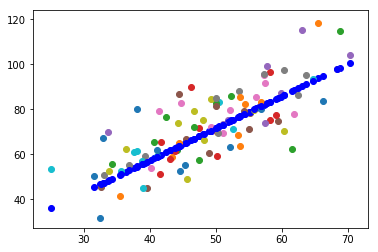

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 6 iterations b = 0.02896524076647862, m = 1.4553540088980408, error = 114.0341490603815


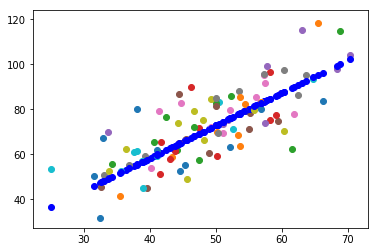

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 7 iterations b = 0.0292561141260467, m = 1.4670946177201354, error = 112.99857731713661


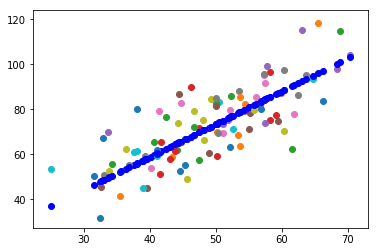

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 8 iterations b = 0.02943196916380713, m = 1.4729832982243762, error = 112.7379818756847


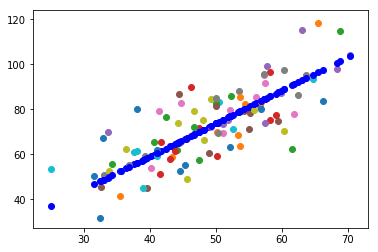

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 9 iterations b = 0.029550129024383073, m = 1.4759365618962286, error = 112.67238435909097


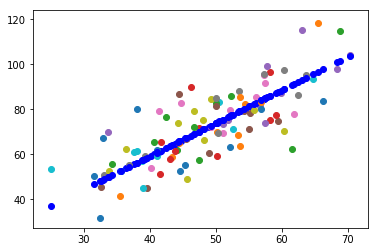

In [22]:
for num in range(0,10):
    run(num)
    plt.show()

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 0 iterations b = 0, m = 0, error = 5565.107834483211


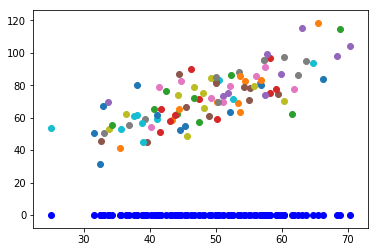

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 1 iterations b = 7273.505055368648, m = 368535.1486795526, error = 338577560196234.8


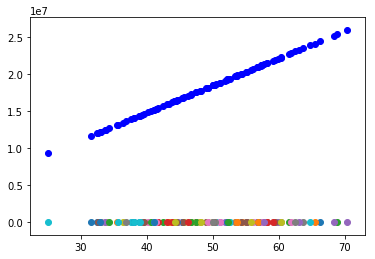

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 2 iterations b = -1804999768.4594338, m = -91835548021.37639, error = 2.102442270355929e+25


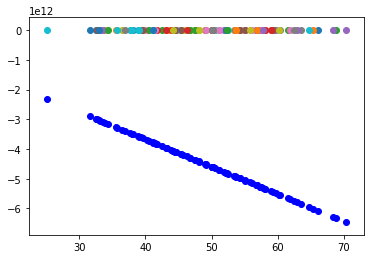

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 3 iterations b = 449790306818348.6, m = 2.2884623734235388e+16, error = 1.3055394154353134e+36


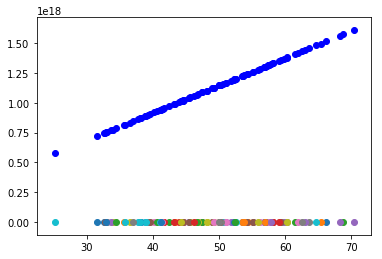

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 4 iterations b = -1.1208385154037519e+20, m = -5.702650168987066e+21, error = 8.106920172255823e+46


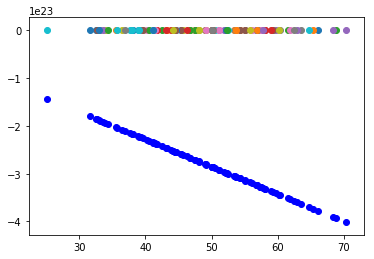

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 5 iterations b = 2.7930325722211295e+25, m = 1.421051065882197e+27, error = 5.034099614481137e+57


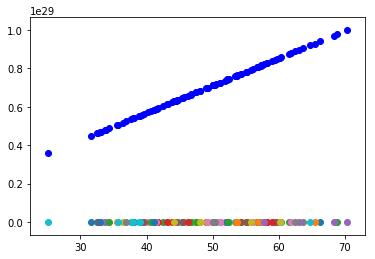

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 6 iterations b = -6.959995434023846e+30, m = -3.541136264726584e+32, error = 3.1259909299769804e+68


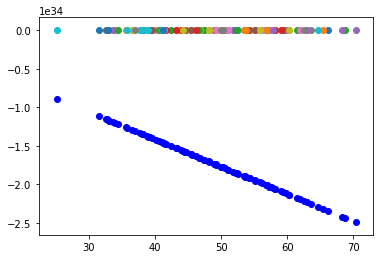

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 7 iterations b = 1.734370623651919e+36, m = 8.8242050876455e+37, error = 1.9411255323968257e+79


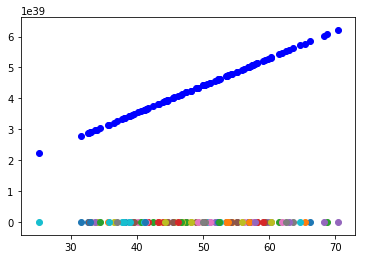

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 8 iterations b = -4.3219014849951924e+41, m = -2.1989155346678226e+43, error = 1.205367647228141e+90


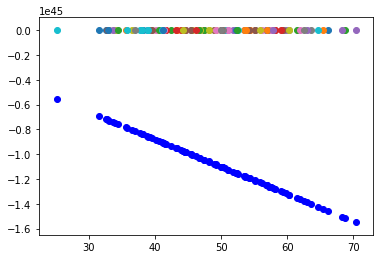

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 9 iterations b = 1.0769804441609604e+47, m = 5.479507197054082e+48, error = 7.484890290378618e+100


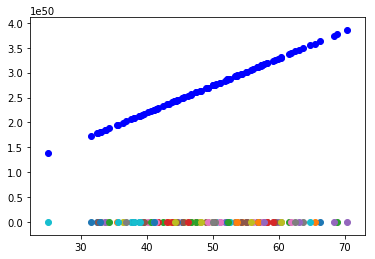

In [24]:
learning_rate = 50
for num in range(0,10):
    run(num,learning_rate)
    plt.show()

# It is shown that it has a bad learning rate.